In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USUARIO\Documents\trabajos_realizados\Maria_Celeste\tarea4\Mall_Customers.csv")
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Estadísticas descriptivas de las variables numéricas
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


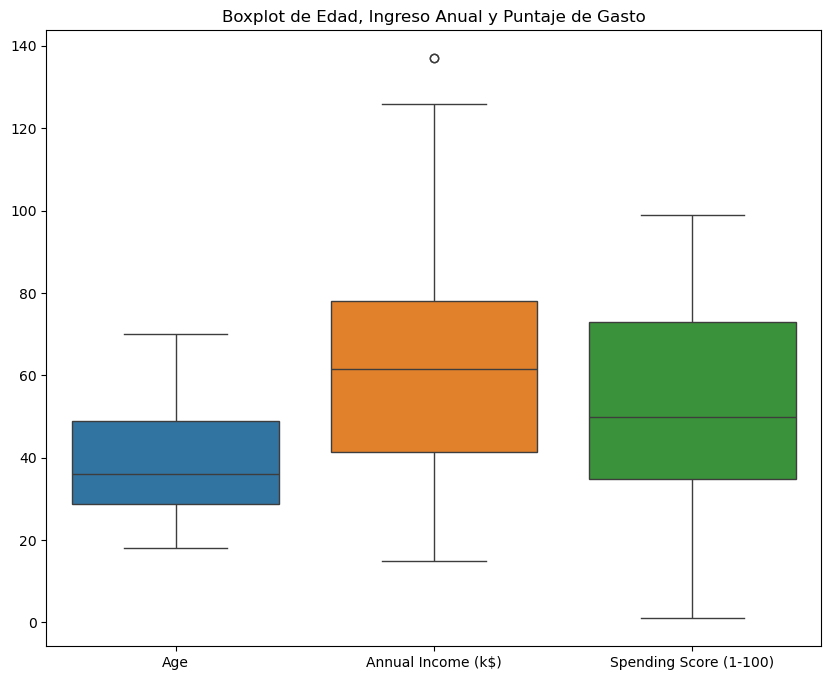

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para detectar valores atípicos
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Boxplot de Edad, Ingreso Anual y Puntaje de Gasto")
plt.show()


In [11]:
# Eliminar valores atípicos en Ingreso Anual (por encima de 140k)
df = df[df['Annual Income (k$)'] < 140]


In [13]:
# Codificación de la variable 'Gender' (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [15]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

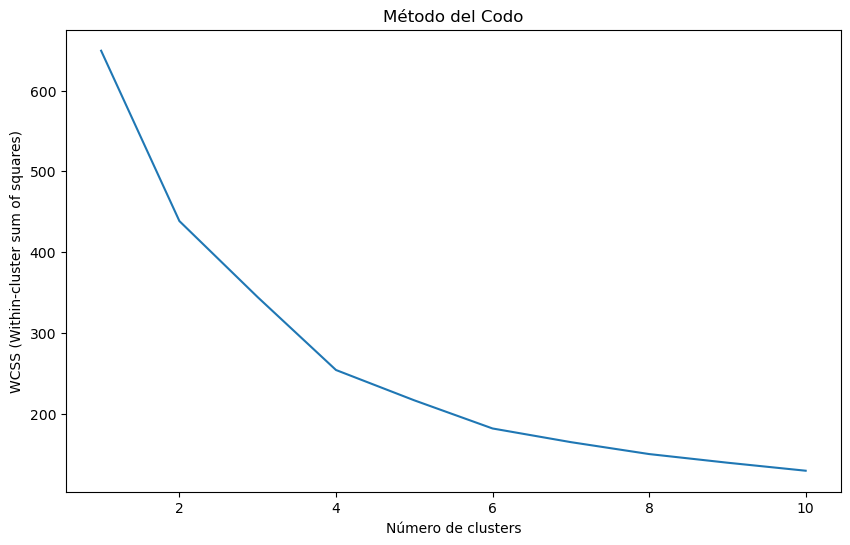

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usar el método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas numéricas para la escalación (sin incluir 'CustomerID' y 'Gender')
df_scaled = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Ahora puedes ejecutar el modelo K-means con los datos escalados
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)

# Predicciones del modelo
y_kmeans = kmeans.predict(df_scaled)

# Coeficiente de Silhouette
sil_score = silhouette_score(df_scaled, y_kmeans)
print("Silhouette Coefficient: ", sil_score)

# Índice de Calinski-Harabasz
calinski_score = calinski_harabasz_score(df_scaled, y_kmeans)
print("Calinski-Harabasz Index: ", calinski_score)


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient:  0.357793388710272
Calinski-Harabasz Index:  101.6949470919303


In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Entrenamos el modelo K-means con el número de clusters que elijas (3 o 4)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)  # Usamos los datos escalados para el modelo

# Predicciones del modelo
y_kmeans = kmeans.predict(df_scaled)

# Coeficiente de Silhouette
sil_score = silhouette_score(df_scaled, y_kmeans)
print("Silhouette Coefficient: ", sil_score)

# Índice de Calinski-Harabasz
calinski_score = calinski_harabasz_score(df_scaled, y_kmeans)
print("Calinski-Harabasz Index: ", calinski_score)


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficient:  0.357793388710272
Calinski-Harabasz Index:  101.6949470919303


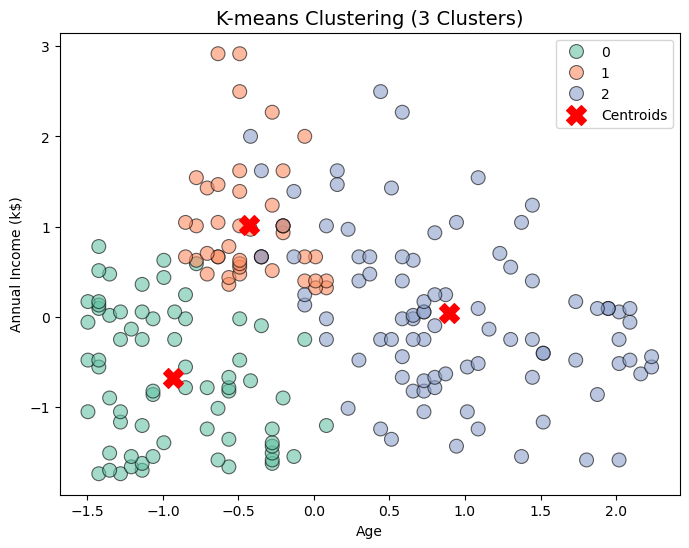

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los centros de los clusters
centroids = kmeans.cluster_centers_

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Scatter plot de los datos con los colores de los clusters
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=y_kmeans, palette='Set2', s=100, edgecolor='k', alpha=0.6)

# Marcar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Títulos y etiquetas
plt.title('K-means Clustering (3 Clusters)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

plt.show()
